In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
from pandas.api.types import CategoricalDtype
from pandas_profiling import ProfileReport

In [2]:
test = pd.read_csv('test-creditcard.csv',index_col = 0, na_values = ["??","###"])
train = pd.read_csv('train-creditcard.csv',index_col = 0, na_values = ["??","###"])

In [3]:
train.shape, test.shape

((45528, 18), (11383, 17))

In [4]:
train.head()

,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
customer_id,,,,,,,,,,,,,,,,,,
CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [5]:
features_names = train.iloc[:,3:17]

In [6]:
features_names.shape

(45528, 14)

In [7]:
features_names.head()

,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
customer_id,,,,,,,,,,,,,,
CST_115179,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1
CST_121920,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0
CST_109330,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0
CST_128288,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0
CST_151355,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0


In [8]:
test.head()

,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
customer_id,,,,,,,,,,,,,,,,,
CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [9]:
test.columns, train.columns

(Index(['name', 'age', 'gender', 'owns_car', 'owns_house', 'no_of_children',
        'net_yearly_income', 'no_of_days_employed', 'occupation_type',
        'total_family_members', 'migrant_worker', 'yearly_debt_payments',
        'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults',
        'default_in_last_6months'],
       dtype='object'),
 Index(['name', 'age', 'gender', 'owns_car', 'owns_house', 'no_of_children',
        'net_yearly_income', 'no_of_days_employed', 'occupation_type',
        'total_family_members', 'migrant_worker', 'yearly_debt_payments',
        'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults',
        'default_in_last_6months', 'credit_card_default'],
       dtype='object'))

In [10]:
target = 'credit_card_default'

In [11]:
#sn.distplot(test["credit_card_default"])

In [12]:
train.dtypes

name                        object
age                          int64
gender                      object
owns_car                    object
owns_house                  object
no_of_children             float64
net_yearly_income          float64
no_of_days_employed        float64
occupation_type             object
total_family_members       float64
migrant_worker             float64
yearly_debt_payments       float64
credit_limit               float64
credit_limit_used(%)         int64
credit_score               float64
prev_defaults                int64
default_in_last_6months      int64
credit_card_default          int64
dtype: object

In [13]:
train.dtypes.value_counts()

float64    8
object     5
int64      5
dtype: int64

In [14]:
#test.head()

# Univarient variable

In [15]:
train['credit_card_default'].value_counts()

0    41831
1     3697
Name: credit_card_default, dtype: int64

In [16]:
train['credit_card_default'].value_counts(normalize=True)

0    0.918797
1    0.081203
Name: credit_card_default, dtype: float64

<AxesSubplot:>

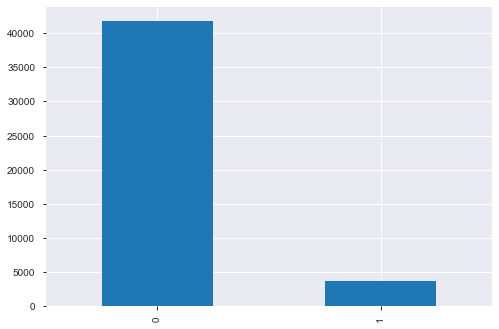

In [17]:
train['credit_card_default'].value_counts().plot.bar()

<AxesSubplot:xlabel='age', ylabel='Density'>

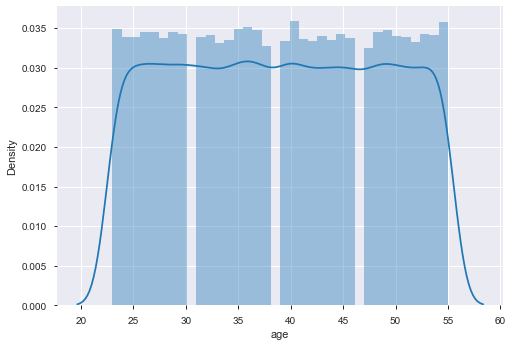

In [18]:
sn.distplot(train["age"])

<AxesSubplot:xlabel='credit_card_default', ylabel='Density'>

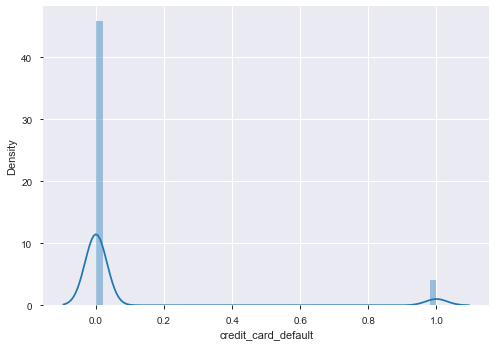

In [19]:
sn.distplot(np.sqrt(train["credit_card_default"]))

<AxesSubplot:>

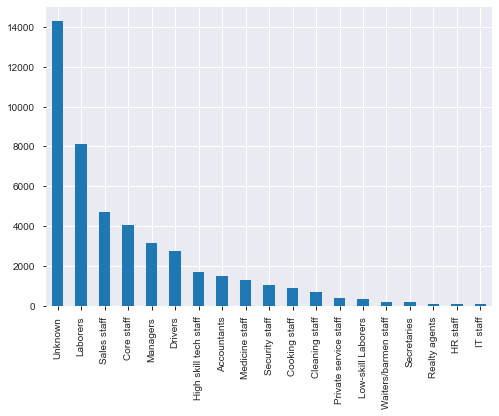

In [20]:
train['occupation_type'].value_counts().plot.bar()

<AxesSubplot:>

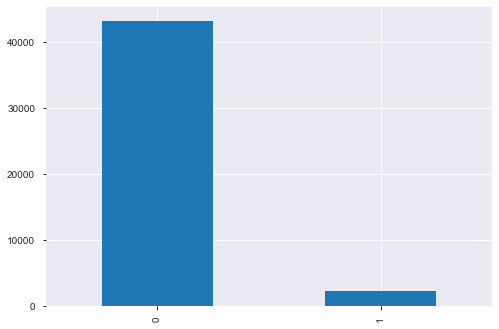

In [21]:
train['default_in_last_6months'].value_counts().plot.bar()

<AxesSubplot:>

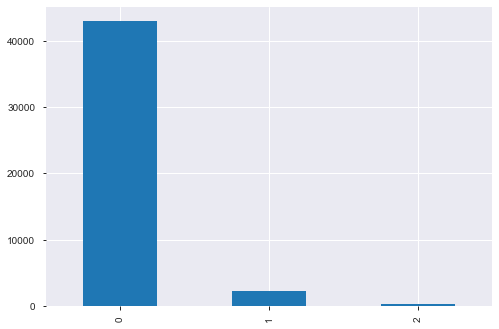

In [22]:
train['prev_defaults'].value_counts().plot.bar()

# Bivarient variable 

credit_card_default        0    1
occupation_type                  
Accountants             1396   78
Cleaning staff           596   69
Cooking staff            799  103
Core staff              3819  243
Drivers                 2426  321
HR staff                  71    7
High skill tech staff   1575  107
IT staff                  64    2
Laborers                7283  851
Low-skill Laborers       283   53
Managers                2954  214
Medicine staff          1176   99
Private service staff    358   29
Realty agents             91   10
Sales staff             4267  458
Secretaries              191    8
Security staff           919  106
Unknown                13381  918
Waiters/barmen staff     182   21


Text(0, 0.5, 'Percentage')

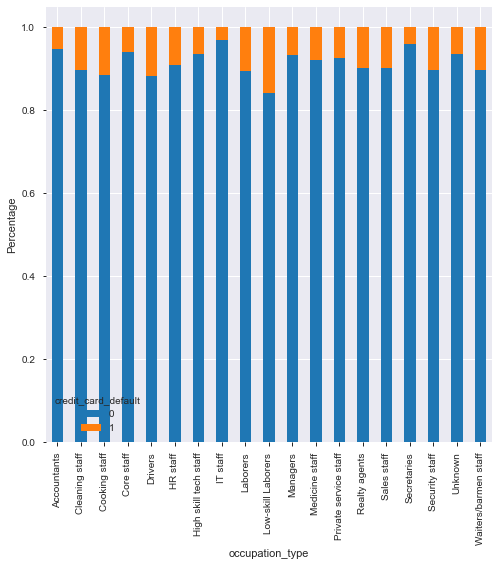

In [23]:
print(pd.crosstab(train['occupation_type'],train['credit_card_default']))

job=pd.crosstab(train['occupation_type'],train['credit_card_default'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('occupation_type')
plt.ylabel('Percentage')

credit_card_default             0         1
default_in_last_6months                    
0                        0.918797  0.030662
1                        0.000000  0.050540


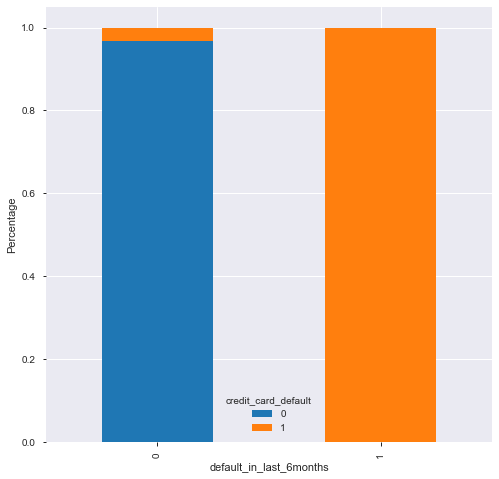

In [24]:
print(pd.crosstab(train['default_in_last_6months'],train['credit_card_default'],normalize = True))

default=pd.crosstab(train['default_in_last_6months'],train['credit_card_default'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default_in_last_6months')
plt.ylabel('Percentage')
plt.show()

In [25]:
print(pd.crosstab(train['credit_limit_used(%)'],train['credit_card_default'],normalize = True))



credit_card_default          0         1
credit_limit_used(%)                    
0                     0.009445  0.000000
1                     0.008544  0.000000
2                     0.009511  0.000000
3                     0.009467  0.000000
4                     0.009027  0.000000
...                        ...       ...
95                    0.008698  0.002768
96                    0.009027  0.002482
97                    0.009313  0.002548
98                    0.008588  0.002680
99                    0.009137  0.003075

[100 rows x 2 columns]


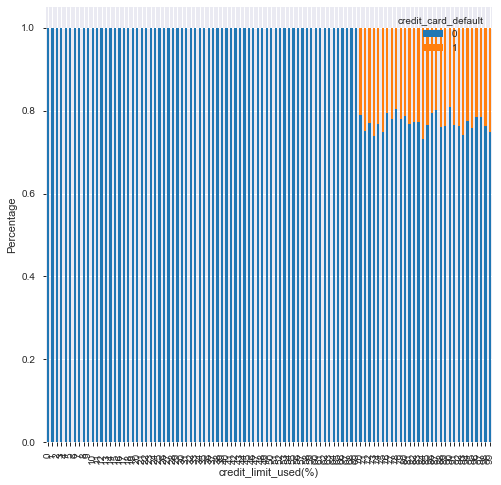

In [26]:
job=pd.crosstab(train['credit_limit_used(%)'],train['credit_card_default'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('credit_limit_used(%)')
plt.ylabel('Percentage')
plt.show()

<AxesSubplot:>

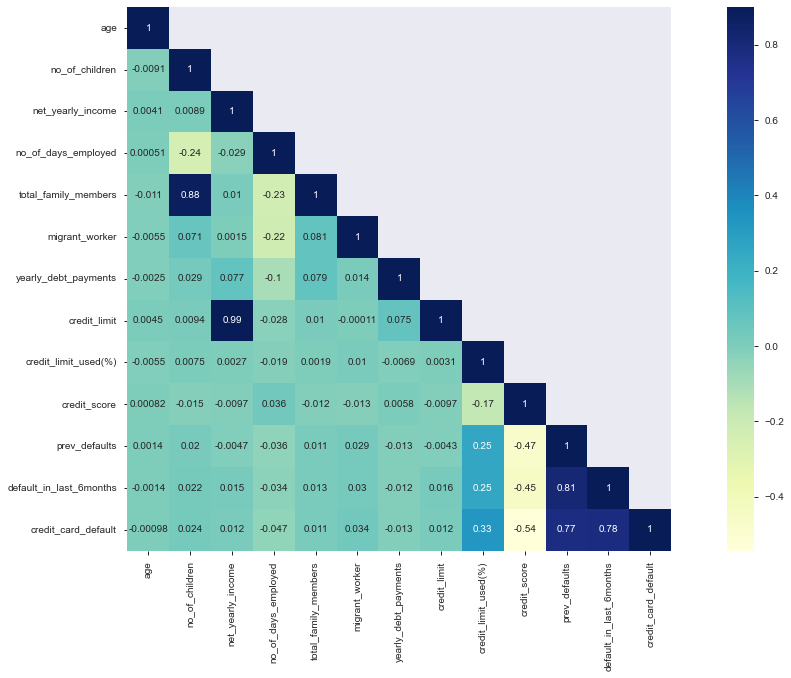

In [27]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [28]:
train.isnull().sum()

name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [29]:
#train.isnull().sum()

<function matplotlib.pyplot.show(close=None, block=None)>

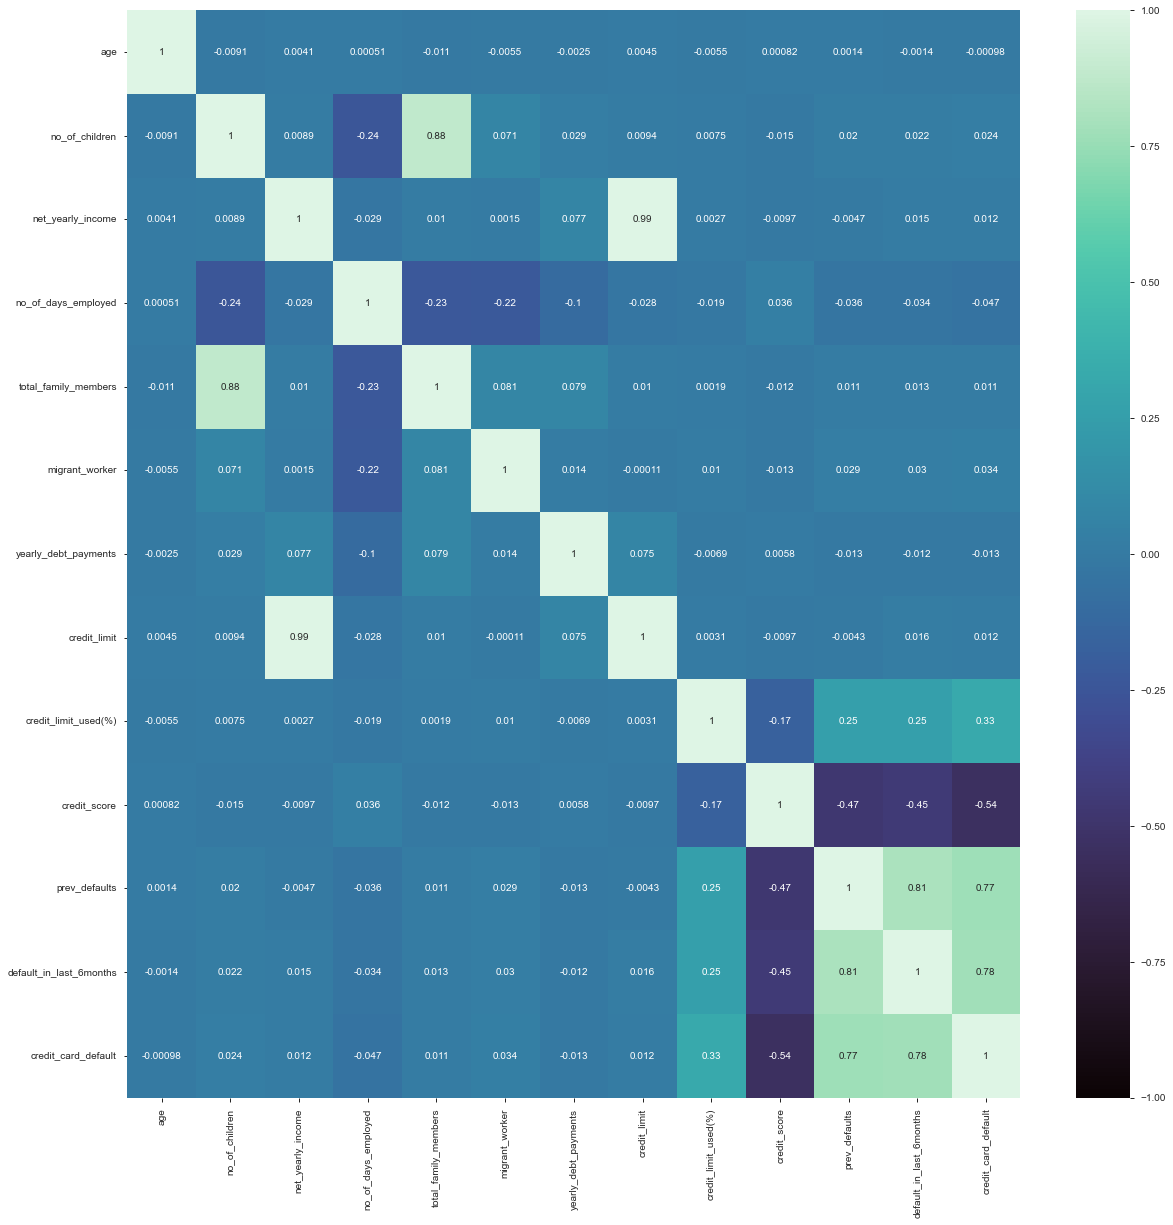

In [30]:
# corr = train.corr()
plt.figure(figsize=(20,20))
sn.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show

In [31]:
#ProfileReport(train)

In [32]:
#test.info()

In [33]:
#train['owns_car'].replace('Y',1,inplace=True)
#train['owns_car'].replace('N',0,inplace=True)
#np.unique(train['owns_car'])

<AxesSubplot:xlabel='no_of_children'>

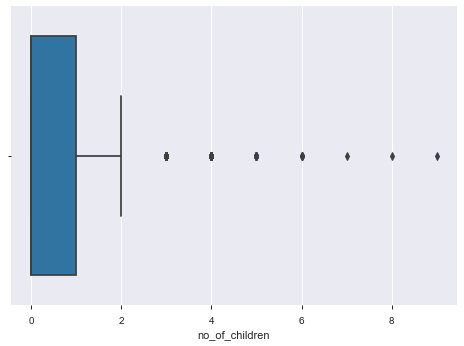

In [34]:
sn.boxplot(train['no_of_children'])

<AxesSubplot:xlabel='no_of_days_employed'>

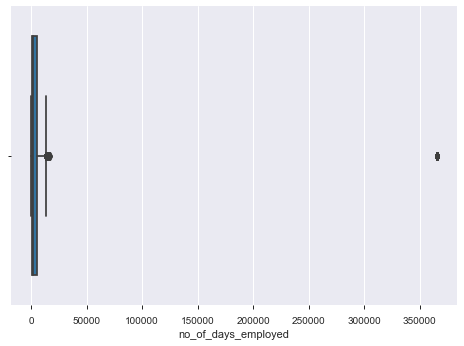

In [35]:
sn.boxplot(train['no_of_days_employed'])

In [36]:
train.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,45528.000000,44754.000000,4.552800e+04,45065.000000,45445.000000,45441.000000,45433.000000,4.552800e+04,45528.00000,45520.000000,45528.000000,45528.000000,45528.000000
mean,38.993411,0.420655,2.006556e+05,67609.289293,2.158081,0.179111,31796.965311,4.354842e+04,52.23502,782.791257,0.060710,0.050540,0.081203
std,9.543990,0.724097,6.690740e+05,139323.524434,0.911572,0.383450,17269.727234,1.487847e+05,29.37691,100.619746,0.264629,0.219059,0.273149
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.263458e+05,936.000000,2.000000,0.000000,19231.140000,2.397381e+04,27.00000,704.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.717149e+05,2224.000000,2.000000,0.000000,29081.650000,3.568804e+04,54.00000,786.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,2.406038e+05,5817.000000,3.000000,0.000000,40561.150000,5.343576e+04,78.00000,867.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.00000,949.000000,2.000000,1.000000,1.000000


In [37]:
train['owns_car'].fillna(train['owns_car'].value_counts().index[0], inplace = True)

In [38]:
train['no_of_children'].fillna(train['no_of_children'].median(), inplace = True)

In [39]:
train['no_of_days_employed'].fillna(train['no_of_days_employed'].median(),inplace = True)

In [40]:
train['total_family_members'].fillna(train['total_family_members'].mean(), inplace = True)

In [41]:
train['migrant_worker'].fillna(train['migrant_worker'].mean(), inplace = True)

In [42]:
train['yearly_debt_payments'].fillna(train['yearly_debt_payments'].mean(), inplace = True)

In [43]:
train['credit_score'].fillna(train['credit_score'].mean(), inplace = True)

In [44]:
train.isnull().sum()

name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

In [45]:
ProfileReport(train)

In [46]:
train = train.copy()

In [47]:
(train['owns_house']).replace('N',0,inplace = True)
(train['owns_house']).replace('Y',1,inplace = True)
(train['owns_car']).replace('N',0,inplace = True)
(train['owns_car']).replace('Y',1,inplace = True)

In [48]:
train = pd.get_dummies(train,drop_first = True)

In [49]:
train.head()

,age,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff
customer_id,,,,,,,,,,,,,,,,,,,,,
CST_115179,46,0,1,0.0,107934.04,612.0,1.0,1.0,33070.28,18690.93,...,0,0,0,0,0,0,0,0,1,0
CST_121920,29,0,1,0.0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,...,0,0,0,0,0,0,0,0,0,0
CST_109330,37,0,1,0.0,230153.17,204.0,2.0,0.0,48416.60,41598.36,...,0,0,0,0,0,0,0,0,0,0
CST_128288,39,0,1,0.0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,...,0,0,0,0,0,0,0,0,0,0
CST_151355,46,1,1,0.0,387286.00,1459.0,1.0,0.0,38282.95,52950.64,...,0,0,0,0,0,0,0,0,0,0


In [50]:
train.shape

(45528, 4044)

In [51]:
#(train['owns_house']).replace('N',0,inplace = True)
#(train['owns_house']).replace('Y',1,inplace = True)
#(train['owns_car']).replace('N',0,inplace = True)
#(train['owns_car']).replace('Y',1,inplace = True)

In [52]:
#np.unique(train['gender'])

In [53]:
#del train['no_of_days_employed']

In [54]:
#del train['']

In [55]:
#train.head()

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [57]:
X = train.drop(columns = 'credit_card_default', axis = 1)
Y = train['credit_card_default']

In [58]:
#df2  = pd.get_dummies(train,drop_first = True)

In [59]:
#col_list = list(df2.columns)

In [60]:
#features = list(set(col_list) - set(['credit_card_default']))

In [61]:
#y = df2['credit_card_default'].values
#x = df2[features].values
#print(y,x)

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

In [63]:
print(X.shape, X_train.shape, X_test.shape)

(45528, 4043) (31869, 4043) (13659, 4043)


In [64]:
model = LogisticRegression()

In [65]:
model.fit(X_train,Y_train)

LogisticRegression()

In [66]:
prediction = model.predict(X_test)

In [67]:
cf_matrix = confusion_matrix(Y_test,prediction)

In [68]:
print(cf_matrix)

[[12339   211]
 [  390   719]]


In [69]:
accuracy_score = accuracy_score(Y_test,prediction)

In [70]:
print(accuracy_score)

0.955999707152793


In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
# defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [73]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [74]:
predict = clf.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
acc_scor = accuracy_score(Y_test, predict)

In [77]:
print(acc_scor)

0.9808185079434805


In [90]:
import pickle

In [91]:
filename = 'credit_card_defaults'

In [97]:
pickle.dump(model,open(filename,'wb'))

In [98]:
loaded_model = pickle.load(open(filename,'rb'))

In [100]:
loaded_model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [78]:
test = pd.get_dummies(test)

In [79]:
test_prediction = clf.predict(X_test)

In [80]:
submis = pd.DataFrame()

In [81]:
# creating a Business_Sourced column and saving the predictions in it
#submission_final_project['ID'] = test['ID']
submis['credit_card_default'] = test_prediction

In [82]:
submis.to_csv('submis.csv', header=True, index=False)

In [83]:
t = pd.get_dummies(train)

In [84]:
t.head()

,age,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff
customer_id,,,,,,,,,,,,,,,,,,,,,
CST_115179,46,0,1,0.0,107934.04,612.0,1.0,1.0,33070.28,18690.93,...,0,0,0,0,0,0,0,0,1,0
CST_121920,29,0,1,0.0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,...,0,0,0,0,0,0,0,0,0,0
CST_109330,37,0,1,0.0,230153.17,204.0,2.0,0.0,48416.60,41598.36,...,0,0,0,0,0,0,0,0,0,0
CST_128288,39,0,1,0.0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,...,0,0,0,0,0,0,0,0,0,0
CST_151355,46,1,1,0.0,387286.00,1459.0,1.0,0.0,38282.95,52950.64,...,0,0,0,0,0,0,0,0,0,0


In [85]:
import pydotplus

In [86]:
import graphviz

In [87]:
from sklearn.tree import export_graphviz

In [88]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [89]:
dot_data = export_graphviz(clf,out_file = None, feature_names = features_names)

ValueError: Length of feature_names, 45528 does not match number of features, 4043

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
"""features,labels = make_classification(n_samples = 45528,n_features = 4044,
                                     n_informative = 4043,n_classes = 4043,
                                     n_redundant = 0,
                                     n_clusters_per_class = 1,random_state = 584)"""